# Classifying "Swiss Roll" Data

In this proejct, I used MLPClassifier and SVM to classify the "Swiss Roll" data respectively.

a) 50 percent of the observations have SpectralCluster equals to 1.

b)
  activation  n_layers  n_hidden_neurons  n_iter      loss  misclassification_rate
0   identity         1                 1      10  0.666290                     0.5
1   logistic         3                 7     244  0.000582                     0.0
2       relu         4                 8      40  0.000071                     0.0
3       tanh         4                10      71  0.000112                     0.0

The activation function for the output layer: logistic

d)
activation                       relu
n_layers                            4
n_hidden_neurons                    8
n_iter                             40
loss                      7.12505e-05
misclassification_rate              0



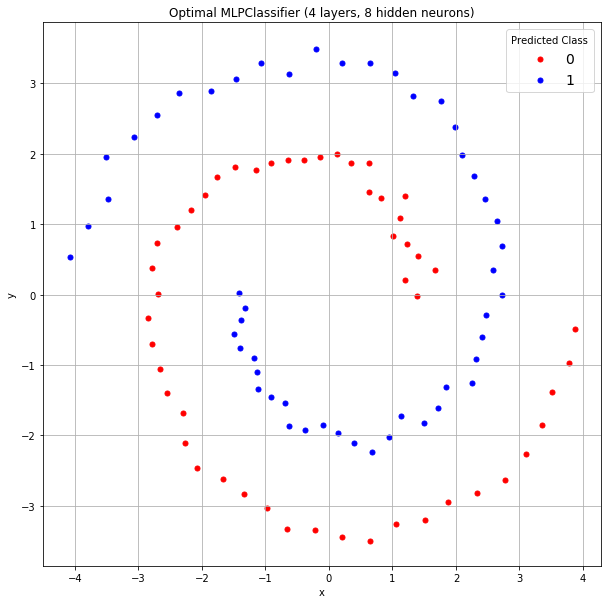


count             : 100
mean              : 0.5000002238
standard deviation: 0.5025147195


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the data
spiral = pd.read_csv('SpiralWithCluster.csv')

'''
a) What percent of the observations have SpectralCluster equals to 1?
'''
percent = spiral.groupby('SpectralCluster').size() / spiral.shape[0]
print('a)', int(percent[1]*100), 'percent of the observations have SpectralCluster equals to 1.\n')

X = spiral[['x', 'y']]
y = spiral['SpectralCluster']


# A customed MLPClassifer fucntion that returns 
# activation function of the output layer, number of iterations, loss value and misclassification_rate
def build_MLPClassifer(activation, n_hidden_layers, n_hidden_neurons, threshold, X, y):
    # Build MLPClassifier
    classifier = MLPClassifier(hidden_layer_sizes = (n_hidden_neurons, ) * n_hidden_layers,
                               activation = activation,
                               solver = 'lbfgs',
                               learning_rate_init = 0.1,
                               max_iter = 5000,
                               random_state = 20191108)
    
    classifier.fit(X, y)
    n_iter = classifier.n_iter_
    loss = classifier.loss_
    out_activation = classifier.out_activation_
    pred_proba = classifier.predict_proba(X)
    pred = np.zeros(len(pred_proba))
    for i in range(len(pred)):
        if pred_proba[i, 1] > threshold:
            pred[i] = 1
        else:
            pred[i] = 0
    misclassification_rate = 1 - accuracy_score(y, pred)
    
    return (out_activation, n_iter, loss, misclassification_rate)

cols = ['activation', 'out_activation', 'n_layers', 'n_hidden_neurons', 'n_iter', 'loss', 'misclassification_rate']
table = pd.DataFrame(columns = cols)
activations = ['identity', 'logistic', 'relu', 'tanh']

for k in np.arange(0, 4): # activation function
    for i in np.arange(1, 6): # number of hidden layers
        for j in np.arange(1, 11): # number of hidden neurons per hidden layer
            out, itr, loss, mis = build_MLPClassifer(activations[k], i, j, percent[1], X, y)
            table = table.append(pd.DataFrame([[activations[k], out, i, j, itr, loss, mis]], 
                                              columns = cols))

result = table.drop(['out_activation'], axis = 1).sort_values(by = ['loss', 'misclassification_rate']).groupby('activation').first().reset_index()
print('b)')
print(result.to_string())          
print()


print('The activation function for the output layer:', table['out_activation'].unique()[0])
print()


result_lowest = result.sort_values(by = ['loss'])
print('d)')
print(result_lowest.iloc[0, :].to_string())
print()

# Build best MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes = (result_lowest.iloc[0, 2], ) * result_lowest.iloc[0, 1],
                           activation = result_lowest.iloc[0, 0],
                           solver = 'lbfgs',
                           learning_rate_init = 0.1,
                           max_iter = 5000,
                           random_state = 20191108)    
# Fit the model
fit = classifier.fit(X, y)

# Predict the class and its probability
pred = fit.predict(X)
pred_proba = fit.predict_proba(X)
spiral['Pred'] = pred
spiral['Pred_proba'] = pred_proba[:, 1]


# Plot the prediction
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['Pred']==i]
    plt.scatter((subset['x']), subset['y'], c = c[i], label = i, s = 25)
plt.grid(True)
plt.title('Optimal MLPClassifier (4 layers, 8 hidden neurons)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()
print()

print('count             :', spiral['Pred_proba'].count())
print('mean              :', round(spiral['Pred_proba'].mean(), 10))
print('standard deviation:', round(spiral['Pred_proba'].std(), 10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
id                 100 non-null int64
x                  100 non-null float64
y                  100 non-null float64
SpectralCluster    100 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
[0 1]


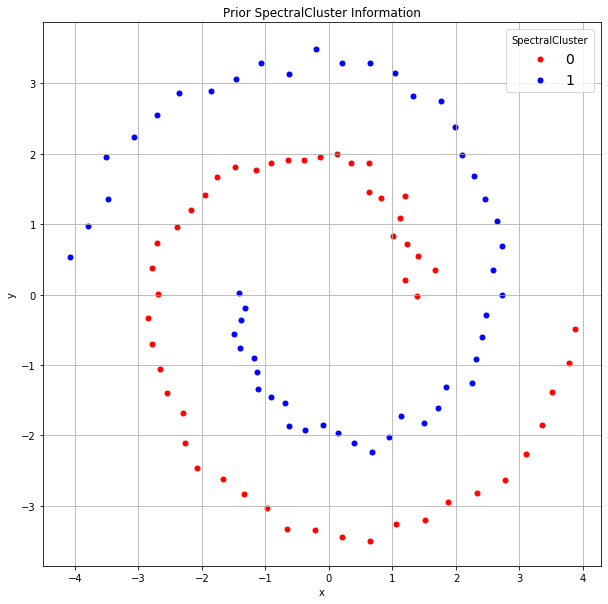

Equation of the separating hyperplane: 0.0033450 + 0.0533351 * x + 0.3286838 * y = 0

Misclassification rate = 0.5



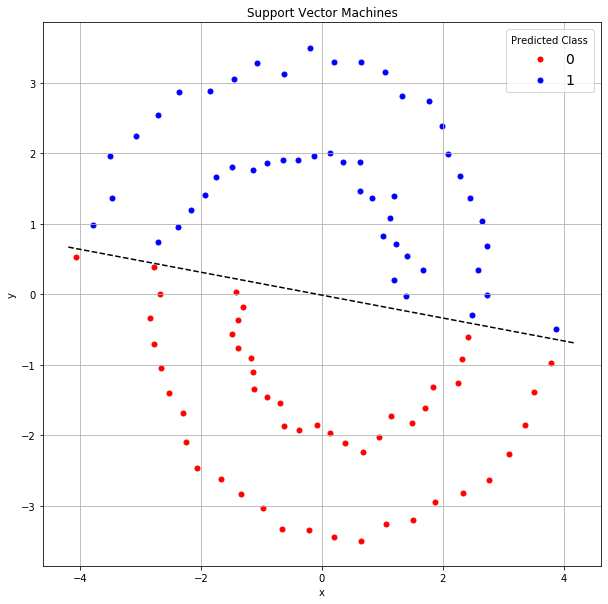

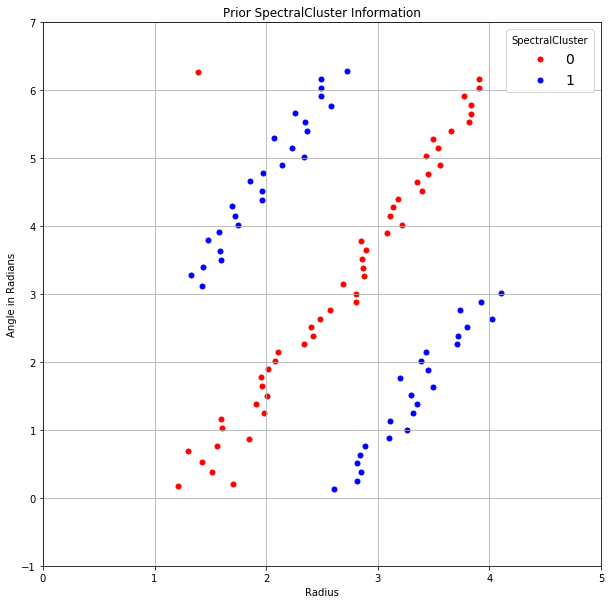

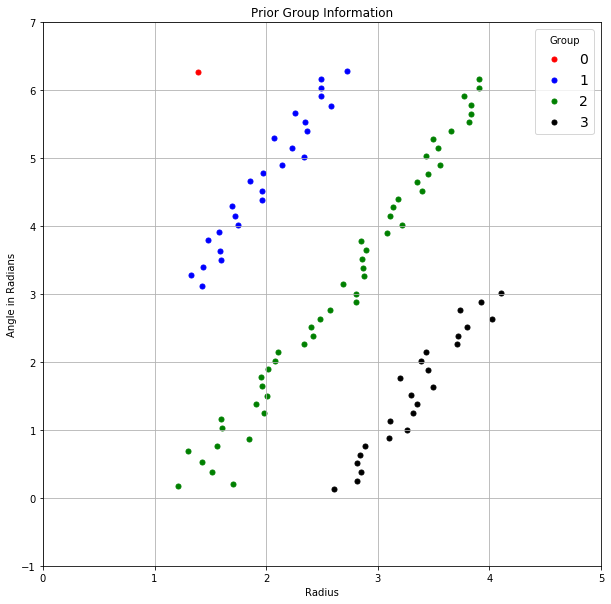


Equation of the separating hyperplane 0: 1.4691251 + 0.9337841 * x -0.4538025 * y = 0

   Equation of the separating hyperplane 1: -0.8768943 + 1.8920953 * x -0.8961325 * y = 0

   Equation of the separating hyperplane 2: -4.1328449 + 2.0125835 * x -0.8375616 * y = 0



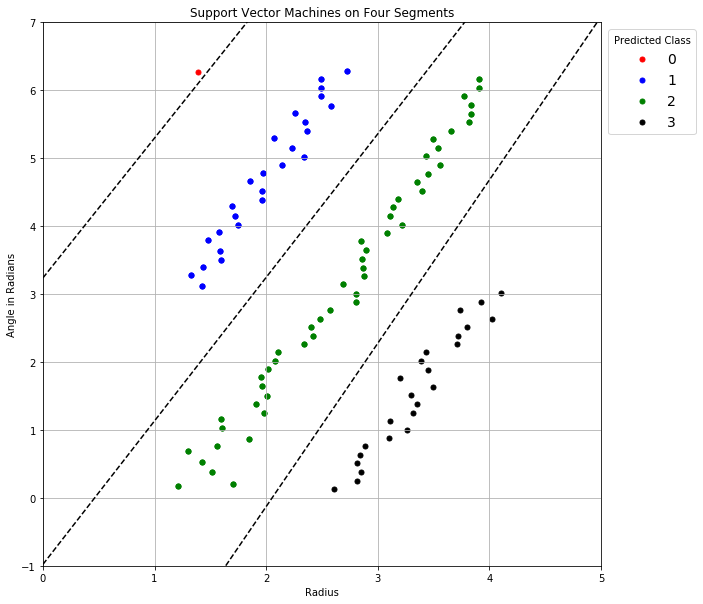


   Support Vector Machines on Two Segments with 3 hyper-curves:


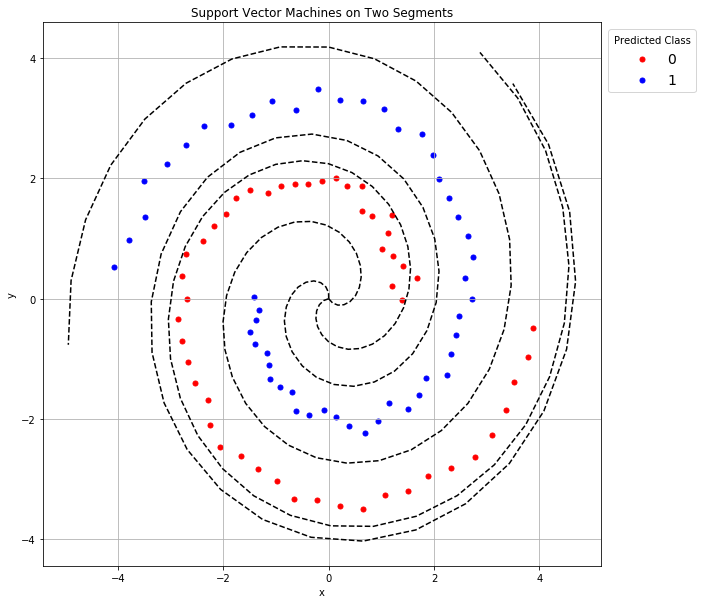


   Support Vector Machines on Two Segments without hyper-curve 0:


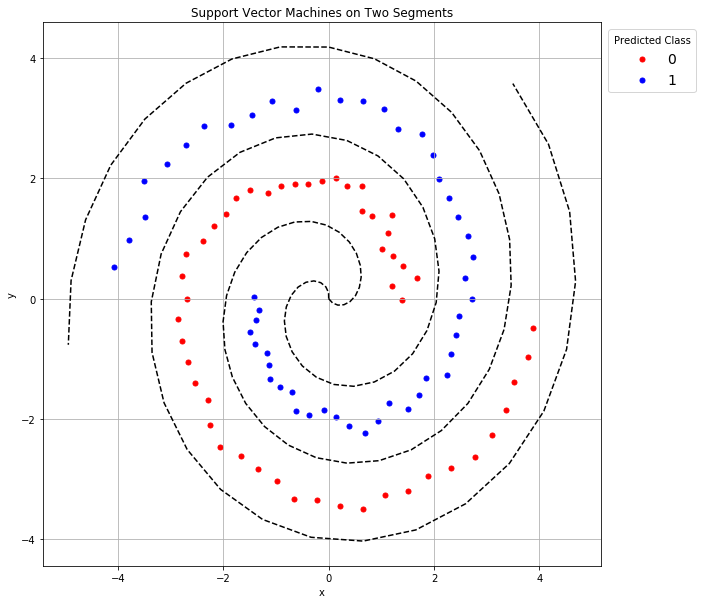


Based on the graph, Separating hyperplane 0 is not needed.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import sklearn.neighbors

# Load the data
spiral = pd.read_csv("SpiralWithcluster.csv")


# Insepct the data
print(spiral.info())
print(spiral['SpectralCluster'].unique())

# Plot prior SpectralCluster information
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['SpectralCluster'] == i]
    plt.scatter(x = subset['x'],
                y = subset['y'], c = c[i], label = i, s = 25)
plt.grid(True)
plt.title('Prior SpectralCluster Information')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'SpectralCluster', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()


# Build SVC classifier
training_data = spiral[['x', 'y']]
training_labels = spiral['SpectralCluster']

classifier = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 20191108, max_iter = -1)
fit = classifier.fit(training_data, training_labels)


beta0 = round(fit.intercept_[0], 7)
beta1 = round(fit.coef_[0][0], 7)
beta2 = round(fit.coef_[0][1], 7)
#print('Intercept = ', beta0)
#print('Coefficients = ', beta1, beta2)
print('Equation of the separating hyperplane:', '{:.7f}'.format(beta0), '+', beta1, '* x +', beta2, '* y = 0')
print()


pred = classifier.predict(training_data)
spiral['Pred'] = pred
print('Misclassification rate =', accuracy_score(training_labels, pred))
print()
    

# Contruct the separating hyperplane from its equation
hyperplane_x = np.linspace(-4.2, 4.2)
hyperplane_y = -(beta0/beta2) - (beta1/beta2) * hyperplane_x

# plot the hyperplane and data points
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['Pred'] == i]
    plt.scatter(x = subset['x'],
                y = subset['y'], c = c[i], label = i, s = 25)
plt.plot(hyperplane_x, hyperplane_y, color = 'black', linestyle = '--')
plt.grid(True)
plt.title('Support Vector Machines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()
print()


# Convert to the polar coordinates
spiral['radius'] = np.sqrt(spiral['x']**2 + spiral['y']**2)
spiral['theta'] = np.arctan2(spiral['y'], spiral['x'])
spiral['theta'] = spiral['theta'].apply(lambda x: (2.0 * np.pi + x) if (x < 0.0) else x)

# Plot prior SpectralCluster information
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['SpectralCluster'] == i]
    plt.scatter(x = subset['radius'],
                y = subset['theta'], c = c[i], label = i, s = 25)
plt.grid(True)
plt.title('Prior SpectralCluster Information')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.xlim(0, 5)
plt.ylim(-1, 7)
plt.legend(title = 'SpectralCluster', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()
print()


# Fit the 4 cluster solution
training_data = spiral[['radius', 'theta']]
kNNSpec = sklearn.neighbors.NearestNeighbors(n_neighbors=4, algorithm ='brute', metric ='euclidean')
nbrs = kNNSpec.fit(training_data)
d3, i3 = nbrs.kneighbors(training_data)

# Retrieve the distances among the observations
dist_object = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
distances = dist_object.pairwise(training_data)


# Create the Adjacency matrix
n_objects = spiral.shape[0]

Adjacency = np.zeros((n_objects, n_objects))
for i in range(n_objects):
    for j in i3[i]:
        if (i <= j):
            Adjacency[i,j] = np.exp(- distances[i][j])
            Adjacency[j,i] = Adjacency[i,j]

# Create the Degree matrix
Degree = np.zeros((n_objects, n_objects))
for i in range(n_objects):
    sum = 0
    for j in range(n_objects):
        sum += Adjacency[i,j]
    Degree[i,i] = sum
    
# Create the Laplacian matrix 
Laplacian = Degree - Adjacency

# Find the eigenvalues and eigenvectors
evals, evecs = np.linalg.eigh(Laplacian)



Z = evecs[:,[0, 1]]
'''
first_evec_mean = np.round(np.mean(Z[[0]]), 10)
first_evec_std = np.round(np.std(Z[[0]]), 10)
print("Mean of the first eigenvector:", first_evec_mean, ", standard deviation:", first_evec_std)

second_evec_mean = np.round(np.mean(Z[[1]]), 10)
second_evec_std = np.round(np.std(Z[[1]]), 10)
print("Mean of the second eigenvector:", second_evec_mean, ", standard deviation:", second_evec_std)

# plot the first eigenvector on the horizontal axis and the second eigenvector on the vertical axis
plt.scatter(Z[[0]], Z[[1]])
plt.xlabel('Z[0]')
plt.ylabel('Z[1]')
plt.show()
'''
spectral_model = KMeans(n_clusters=3, random_state=20191108).fit(Z)

spiral['Group'] = spectral_model.labels_
'''
plt.scatter(spiral['radius'], spiral['theta'], c = spiral['Group'])
plt.title('Prior Group Information')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.grid(True)
plt.show()
'''


'''
Please plot the theta-coordinate against the radius-coordinate in a scatterplot.  
Please color-code the points using the new Group target variable 
(0 = Red, 1 = Blue, 2 = Green, 3 = Black).  
To obtain the full credits, you should properly label the axes, the legend, and the chart title.  
Also, grid lines should be added to the axes.
'''
# Transforms the label of the a lone data point
spiral.loc[0, 'Group'] = 4

# Order the data points
for i in range(spiral.shape[0]):
    if spiral.loc[i, 'Group'] == 4:
        spiral.loc[i, 'Group'] = 0
    elif spiral.loc[i, 'Group'] == 0:
        spiral.loc[i, 'Group'] = 2
    elif spiral.loc[i, 'Group'] == 2:
        spiral.loc[i, 'Group'] = 3   
            
c = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10,10))
for i in range(4):
    subset = spiral[spiral['Group'] == i]
    plt.scatter(x = subset['radius'],
                y = subset['theta'], c = c[i], label = i, s = 25)
plt.title('Prior Group Information')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.xlim(0, 5)
plt.ylim(-1, 7)
plt.legend(title = 'Group', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()
print()


# Build SVM 0
training_data0 = spiral[spiral['Group'] < 2][['radius', 'theta']]
training_labels0 = spiral[spiral['Group'] < 2]['Group']
classifier0 = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 20191108, max_iter = -1)
fit0 = classifier0.fit(training_data0, training_labels0)
training_data0['Group'] = fit0.predict(training_data0)

beta00 = round(fit0.intercept_[0], 7)
beta01 = round(fit0.coef_[0][0], 7)
beta02 = round(fit0.coef_[0][1], 7)
#print('Intercept = ', beta00)
#print('Coefficients = ', beta01, beta02)
print('Equation of the separating hyperplane 0:', beta00, '+', beta01, '* x', beta02, '* y = 0')
print()

# Build SVM 1
training_data1 = spiral[spiral['Group']==1][['radius', 'theta']]
training_data1 = pd.concat([training_data1, spiral[spiral['Group']==2][['radius', 'theta']]])
training_labels1 = spiral[spiral['Group']==1]['Group']
training_labels1 = pd.concat([training_labels1, spiral[spiral['Group']==2]['Group']])
classifier1 = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 20191108, max_iter = -1)
fit1 = classifier1.fit(training_data1, training_labels1)
training_data1['Group'] = fit1.predict(training_data1)

beta10 = round(fit1.intercept_[0], 7)
beta11 = round(fit1.coef_[0][0], 7)
beta12 = round(fit1.coef_[0][1], 7)
#print('Intercept = ', beta10)
#print('Coefficients = ', beta11, beta12)
print('   Equation of the separating hyperplane 1:', beta10, '+', beta11, '* x', beta12, '* y = 0')
print()

# Build SVM 2
training_data2 = spiral[spiral['Group'] > 1][['radius', 'theta']]
training_labels2 = spiral[spiral['Group'] > 1]['Group']
classifier2 = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 20191108, max_iter = -1)
fit2 = classifier2.fit(training_data2, training_labels2)
training_data2['Group'] = fit2.predict(training_data2)

beta20 = round(fit2.intercept_[0], 7)
beta21 = round(fit2.coef_[0][0], 7)
beta22 = round(fit2.coef_[0][1], 7)
#print('Intercept = ', beta20)
#print('Coefficients = ', beta21, beta22)
print('   Equation of the separating hyperplane 2:', beta20, '+', beta21, '* x', beta22, '* y = 0')
print()


# Contruct the separating hyperplane 0, 1, 2
hyperplane_x = np.linspace(0, 5)
hyperplane0_y = -(beta00/beta02) - (beta01/beta02) * hyperplane_x
hyperplane1_y = -(beta10/beta12) - (beta11/beta12) * hyperplane_x
hyperplane2_y = -(beta20/beta22) - (beta21/beta22) * hyperplane_x

# plot the hyperplane 0, 1, 2 and data points
spiral_polar = pd.concat([training_data0, training_data1, training_data2])
c = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10,10))
for i in range(4):
    subset = spiral_polar[spiral_polar['Group'] == i]
    plt.scatter(x = subset['radius'],
                y = subset['theta'], c = c[i], label = i, s = 25)
plt.plot(hyperplane_x, hyperplane0_y, color = 'black', linestyle = '--')
plt.plot(hyperplane_x, hyperplane1_y, color = 'black', linestyle = '--')
plt.plot(hyperplane_x, hyperplane2_y, color = 'black', linestyle = '--')
plt.title('Support Vector Machines on Four Segments')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.xlim(0, 5)
plt.ylim(-1, 7)
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()
print()


hyperplane0_x = hyperplane_x * np.cos(hyperplane0_y)
hyperplane0_y = hyperplane_x * np.sin(hyperplane0_y)

hyperplane1_x = hyperplane_x * np.cos(hyperplane1_y)
hyperplane1_y = hyperplane_x * np.sin(hyperplane1_y)

hyperplane2_x = hyperplane_x * np.cos(hyperplane2_y)
hyperplane2_y = hyperplane_x * np.sin(hyperplane2_y)


print('   Support Vector Machines on Two Segments with 3 hyper-curves:')
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['SpectralCluster'] == i]
    plt.scatter(x = subset['x'],
                y = subset['y'], c = c[i], label = i, s = 25)
plt.plot(hyperplane0_x, hyperplane0_y, color = 'black', linestyle = '--')
plt.plot(hyperplane1_x, hyperplane1_y, color = 'black', linestyle = '--')
plt.plot(hyperplane2_x, hyperplane2_y, color = 'black', linestyle = '--')
plt.title('Support Vector Machines on Two Segments')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()
print()

print('   Support Vector Machines on Two Segments without hyper-curve 0:')
c = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subset = spiral[spiral['SpectralCluster'] == i]
    plt.scatter(x = subset['x'],
                y = subset['y'], c = c[i], label = i, s = 25)
plt.plot(hyperplane1_x, hyperplane1_y, color = 'black', linestyle = '--')
plt.plot(hyperplane2_x, hyperplane2_y, color = 'black', linestyle = '--')
plt.title('Support Vector Machines on Two Segments')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.show()
print()
print('Based on the graph, Separating hyperplane 0 is not needed.')